<a href="https://www.kaggle.com/code/muradpitafi/image-classification-using-cnn?scriptVersionId=154376672" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models  
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
xtest.shape

(10000, 32, 32, 3)

In [5]:
xtrain.shape

(50000, 32, 32, 3)

In [6]:
ytrain.shape

(50000, 1)

In [7]:
ytest.shape

(10000, 1)

In [8]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
ytest = ytest.reshape(-1,)

In [11]:
classes = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

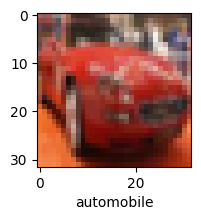

In [13]:
plot_sample(xtrain,ytrain, 5)

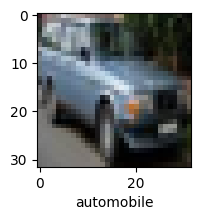

In [14]:
plot_sample(xtrain, ytrain, 201)

In [15]:
#normalize data 
xtrain = xtrain /255.0
xtest = xtest / 255.0

In [16]:
ann = models.Sequential([layers.Flatten(input_shape= (32,32,3)),
                        layers.Dense(3000, activation = 'relu'),
                        layers.Dense(1000, activation = 'relu'),
                        layers.Dense(10, activation = 'softmax')])

In [17]:
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 4ms/step - loss: 1.8159 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6256 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5451 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4837 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4336 - accuracy: 0.4969


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

ypred = ann.predict(xtest)
ypred_classes = [np.argmax(element) for element in ypred]

print('classification report:\n', classification_report(ytest, ypred_classes))


313/313 [==============================] - 1s 1ms/step
classification report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1000
           1       0.54      0.70      0.61      1000
           2       0.30      0.52      0.38      1000
           3       0.38      0.31      0.34      1000
           4       0.33      0.51      0.40      1000
           5       0.43      0.36      0.39      1000
           6       0.63      0.35      0.45      1000
           7       0.68      0.43      0.53      1000
           8       0.64      0.60      0.62      1000
           9       0.65      0.42      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.48     10000
weighted avg       0.51      0.47      0.48     10000



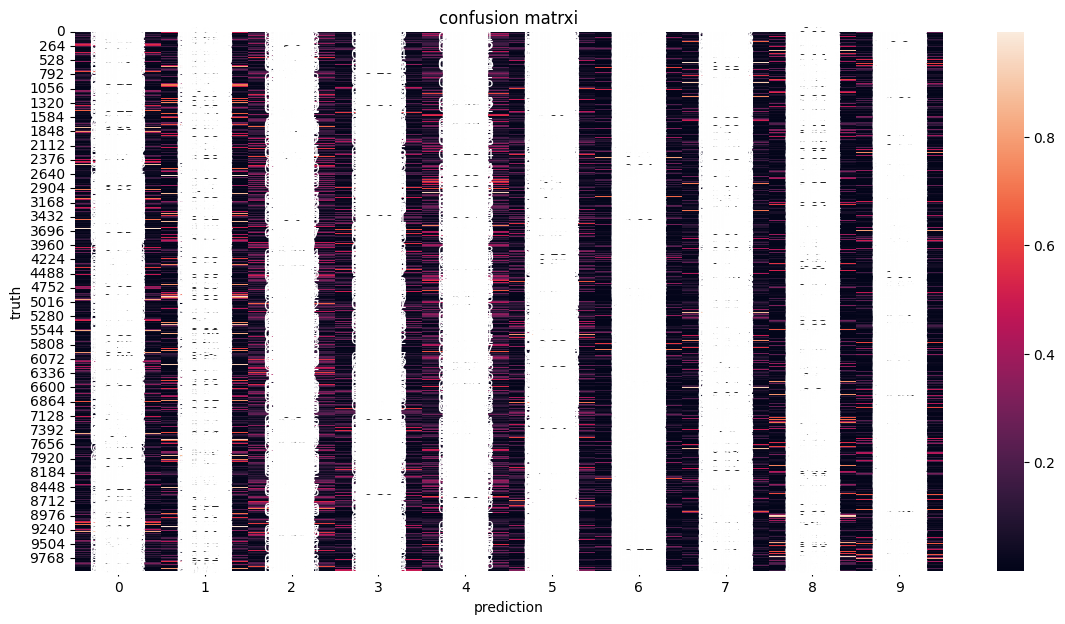

In [19]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(ypred, annot = True)
plt.ylabel('truth')
plt.xlabel('prediction')
plt.title('confusion matrxi')
plt.show()

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
    
])

In [21]:
cnn.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [22]:
cnn.fit(xtrain,ytrain, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.4693 - accuracy: 0.4738
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1026 - accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9707 - accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8823 - accuracy: 0.6940
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8133 - accuracy: 0.7181
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7569 - accuracy: 0.7366
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7071 - accuracy: 0.7527
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6621 - accuracy: 0.7694
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6255 - accuracy: 0.7837
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.59

In [23]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.8952 - accuracy: 0.7054


[0.895233690738678, 0.7053999900817871]

In [24]:
ypred = cnn.predict(xtest)
ypred[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.11128596e-04, 9.64686042e-04, 1.21265987e-03, 9.34385896e-01,
        2.01326533e-04, 5.32034747e-02, 8.55954480e-04, 1.58596561e-06,
        8.73045623e-03, 3.28334208e-05],
       [1.15536841e-05, 3.74328345e-04, 1.79853032e-09, 6.56030608e-09,
        1.14196030e-09, 9.06007977e-11, 1.82770864e-11, 1.42404352e-10,
        9.99614120e-01, 5.63182070e-08],
       [5.30560911e-02, 2.58989632e-01, 1.75538613e-03, 4.28476464e-03,
        1.90239589e-04, 6.81530510e-05, 5.66393501e-05, 3.37610458e-04,
        6.57596588e-01, 2.36648563e-02],
       [9.31057692e-01, 1.49636078e-04, 1.67220309e-02, 1.70963525e-03,
        4.42207418e-03, 2.03469044e-05, 8.40426364e-04, 1.81059659e-04,
        4.47535887e-02, 1.43495214e-04],
       [1.30647493e-06, 7.23496987e-06, 1.13238059e-02, 1.41597077e-01,
        1.12253316e-01, 2.47207657e-03, 7.32279956e-01, 7.79473976e-06,
        5.73174693e-05, 1.28005553e-07]], dtype=float32)

In [25]:
yclasses = [np.argmax(element) for element in ypred]
yclasses[:5]

[3, 8, 8, 0, 6]

In [26]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

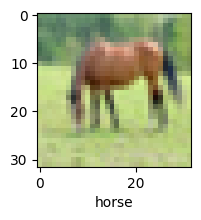

In [27]:
plot_sample(xtest, ytest, 60)

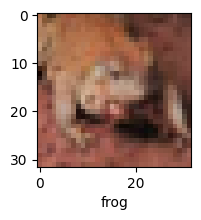

In [28]:
plot_sample(xtest, ytest, 5)

In [29]:
classes [yclasses[60]]

'horse'